In [3]:
import sys

In [4]:
sys.path.append('../')

In [1]:
from data_model import Individual, Region

from sys_utils import load_model
import plotly.express as px

import pandas as pd
import sys
import typing as t

ModuleNotFoundError: No module named 'data_model'

In [2]:
individuals = load_model(
        Individual, name="checkpoints_dev/checkpoint_5.jsonl"
    )

regions = load_model(
        Region, name="checkpoints_dev/regions.jsonl"
    )

In [2]:
def create_df_trend(individuals:t.List[Individual], regions:t.List[Region]):

    indiv = [x for x in individuals if x.regions != None]

    df = [{'wiki_id':x.id.wikidata_id,
               'wikipedia_pages': x.wikipedia_pages,
               'name':x.id.name,
               'birthyear': x.id.birthyear, 
               'region':x.regions,
              'range_impact':x.impact_years,
              'cultural_score': x.cultural_score} for x in indiv]

    df = pd.DataFrame(df)
    df_fig = df.explode('region')

    df_fig['year'] =  df_fig['range_impact'].apply(lambda x : [year for year in range(x[0], x[1]+10, 10)])
    df_fig = df_fig.explode('year')

    df_fig = df_fig.groupby(['region', 'year'])['cultural_score'].sum().reset_index()

    return df_fig

NameError: name 't' is not defined

In [25]:
df_fig = df_fig[df_fig['year']<=1850]

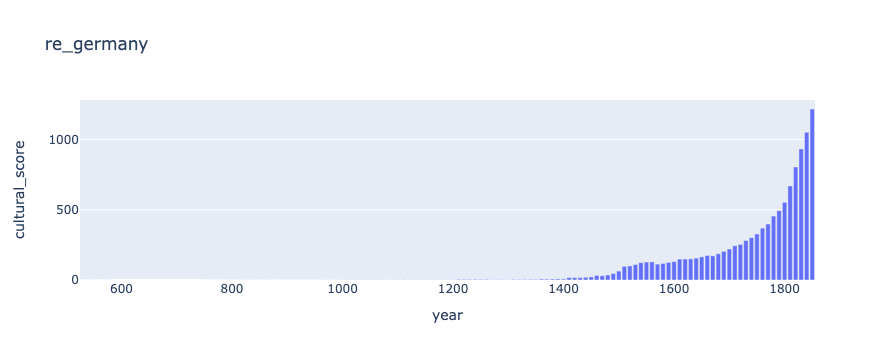

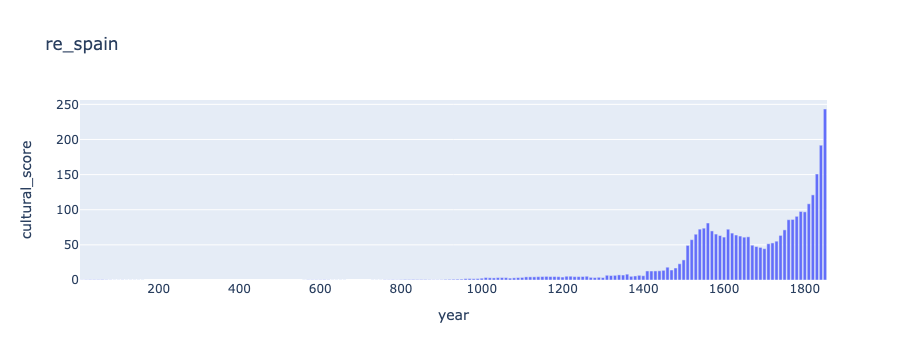

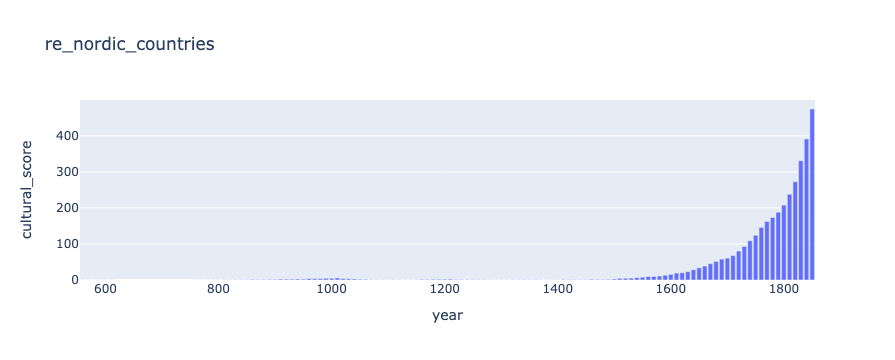

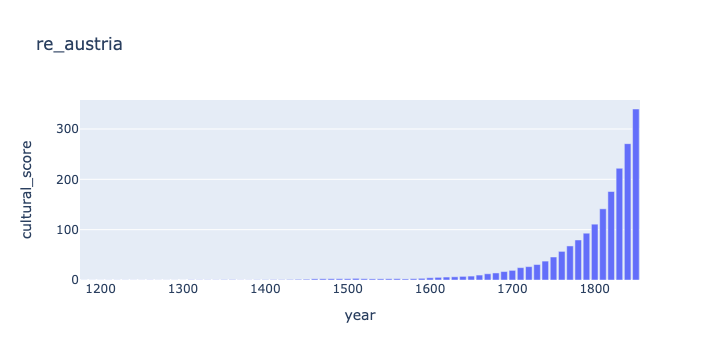

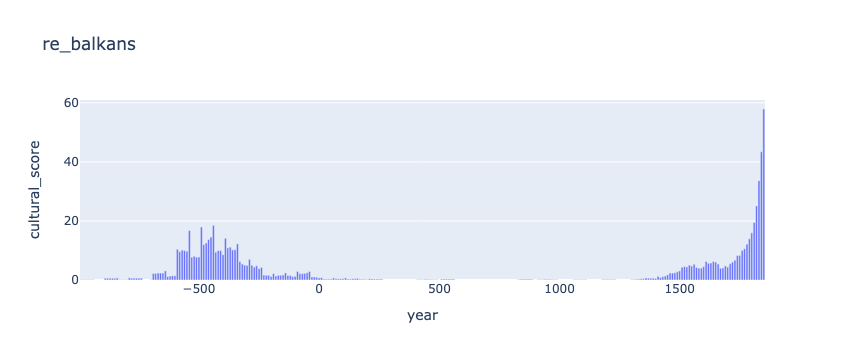

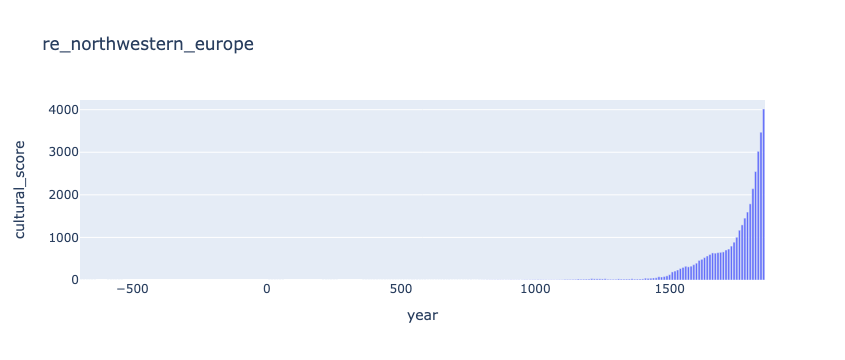

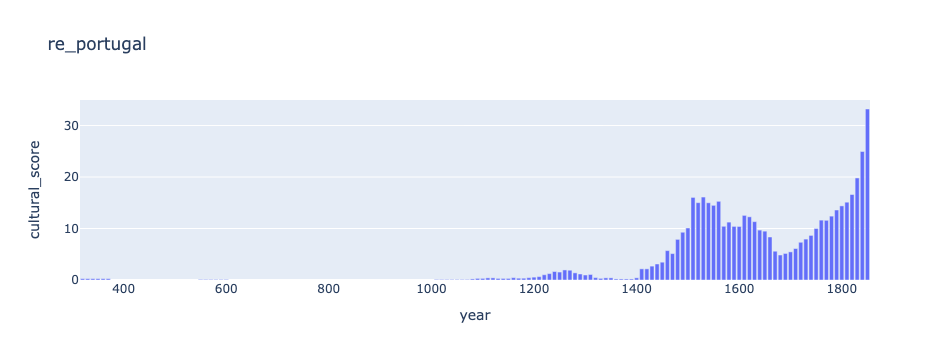

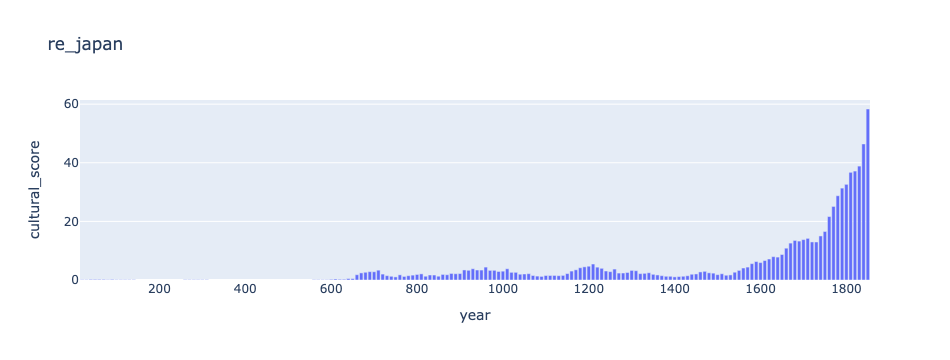

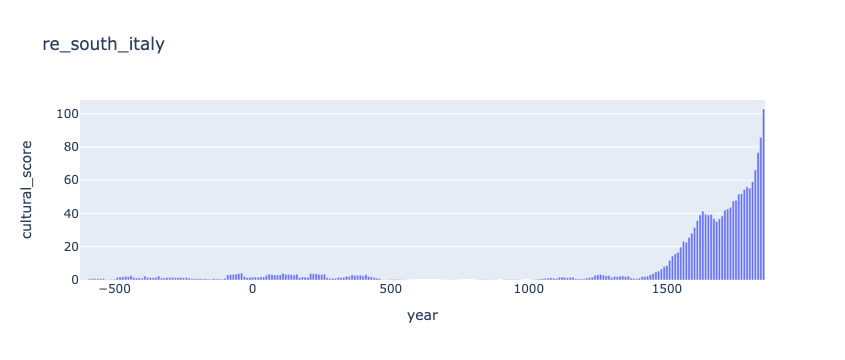

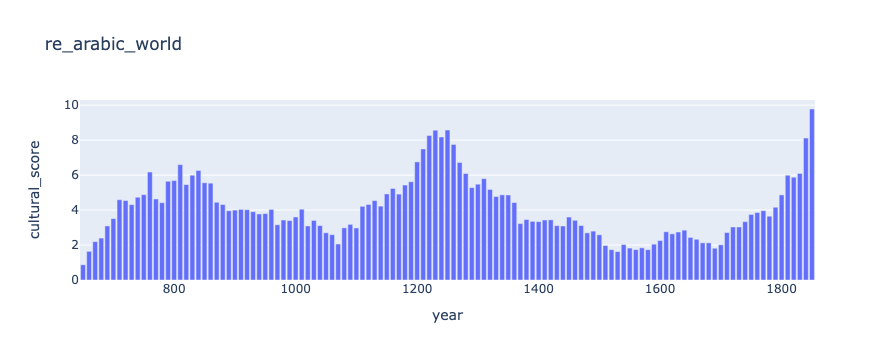

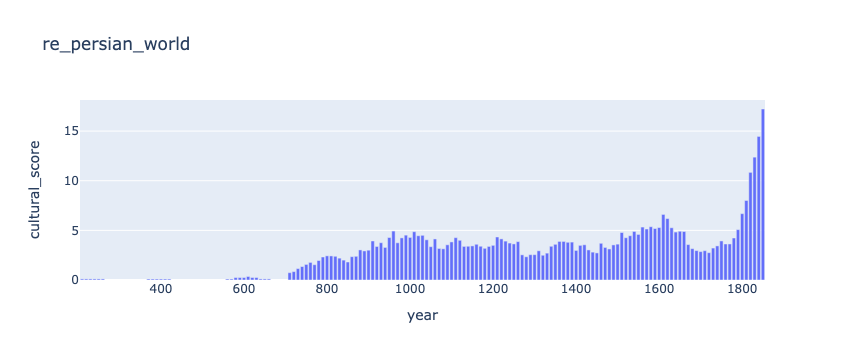

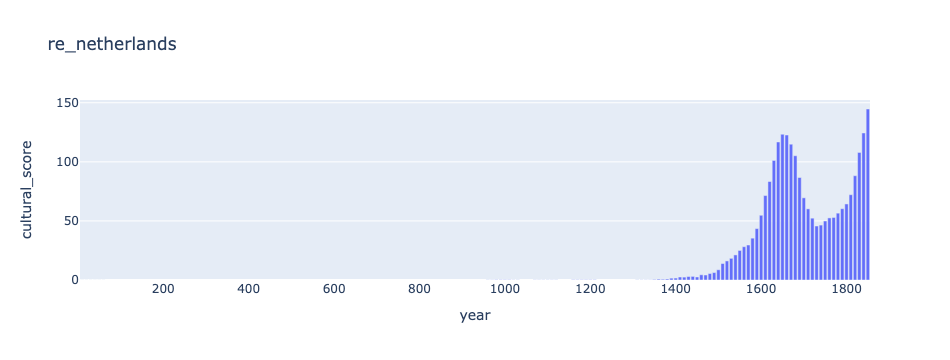

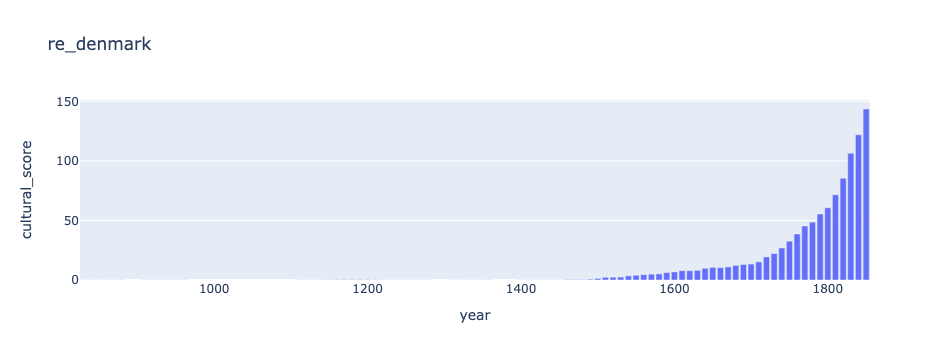

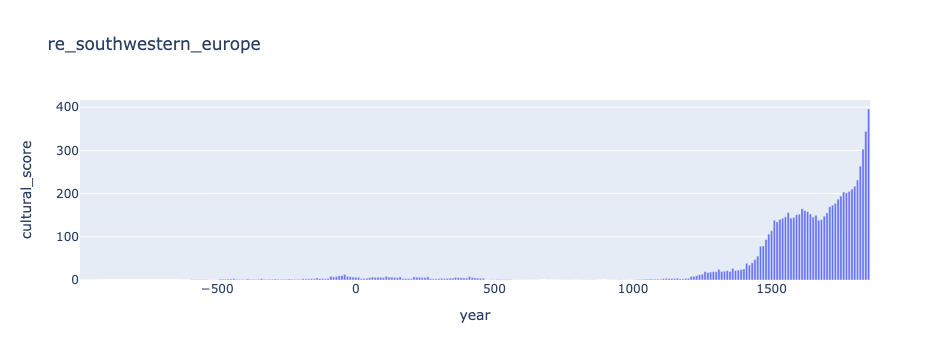

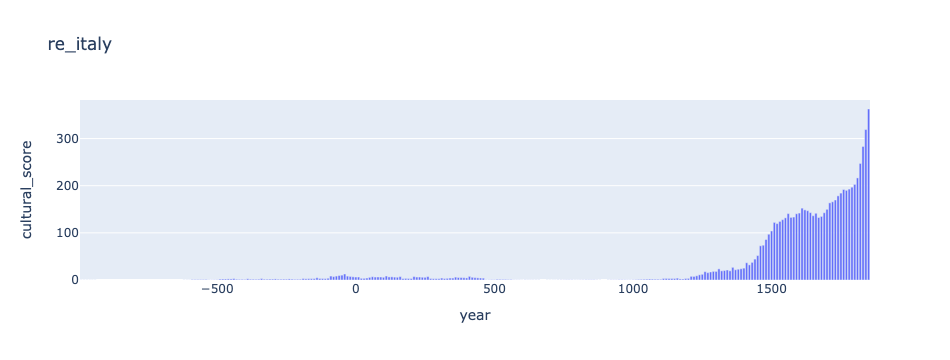

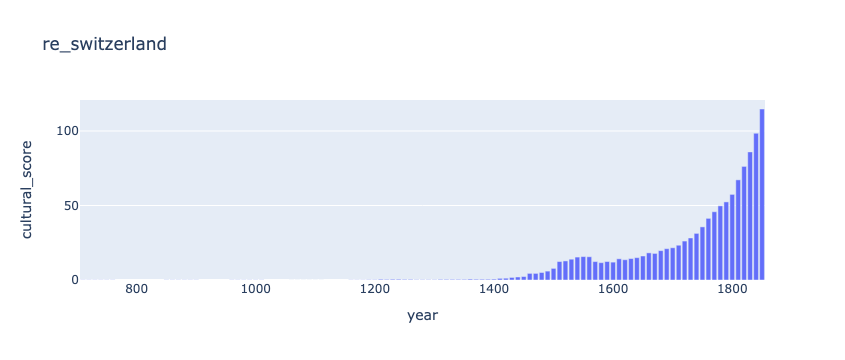

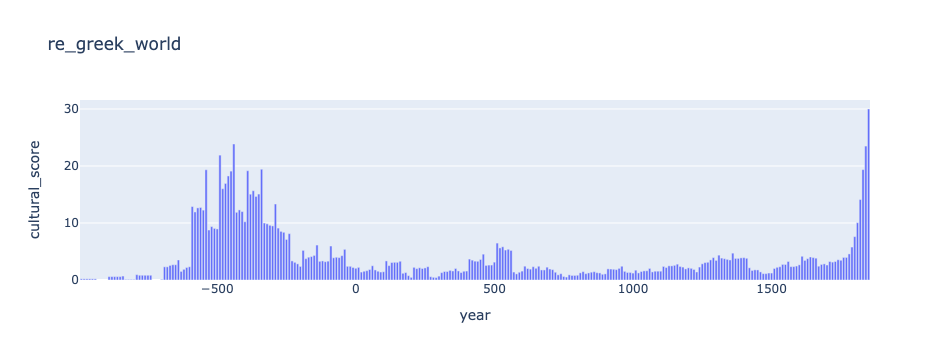

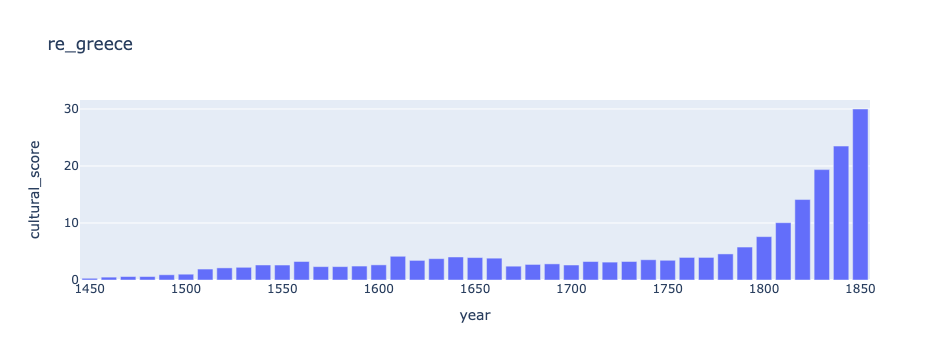

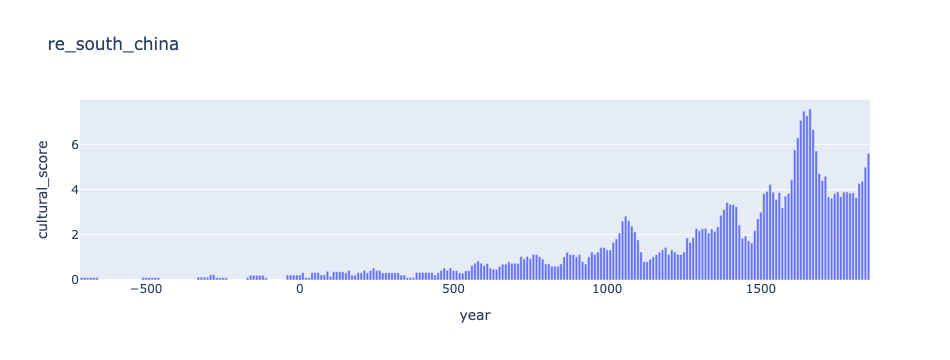

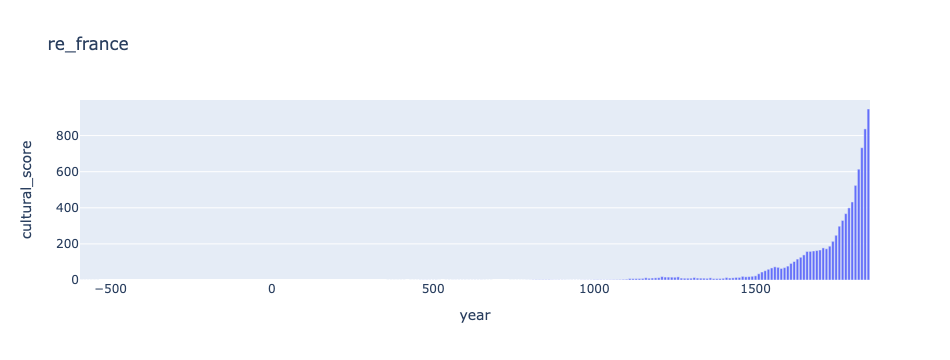

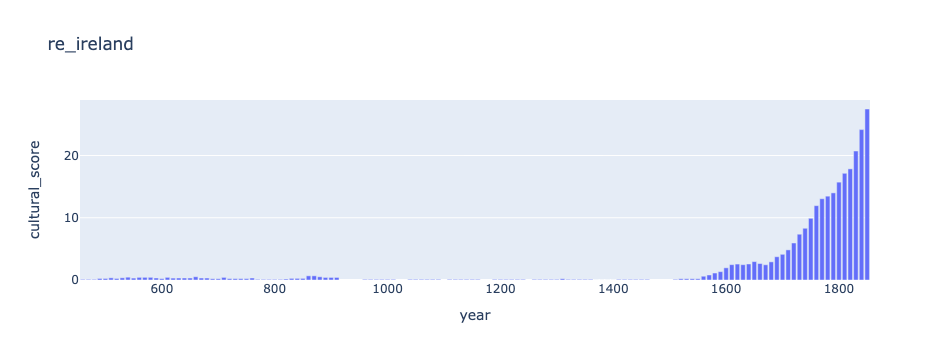

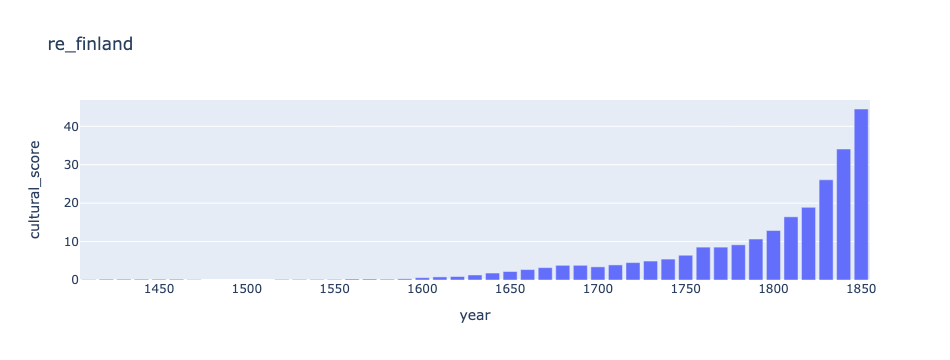

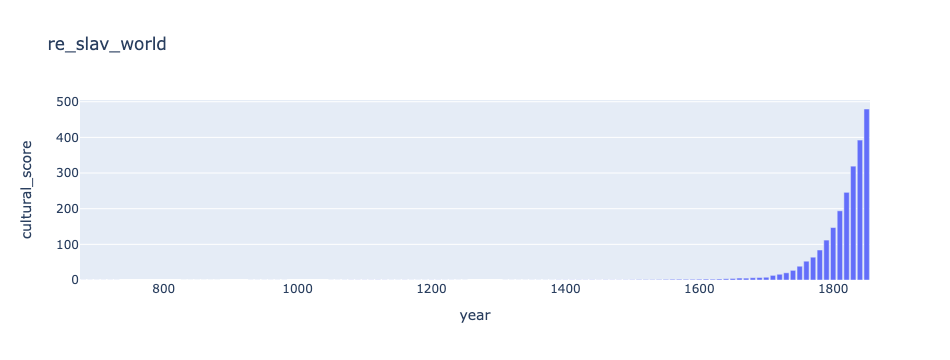

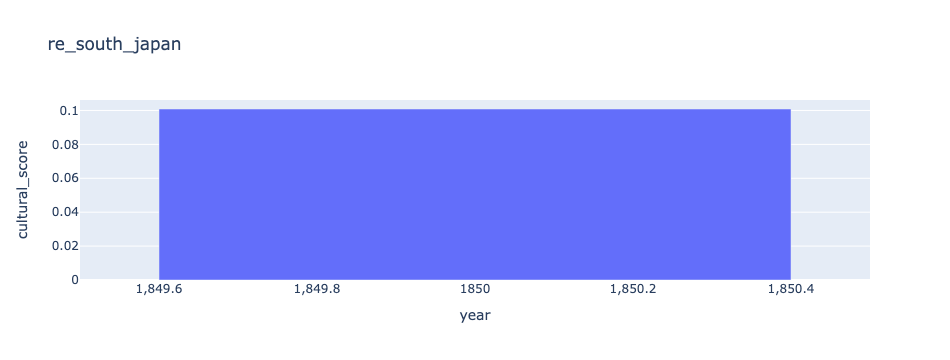

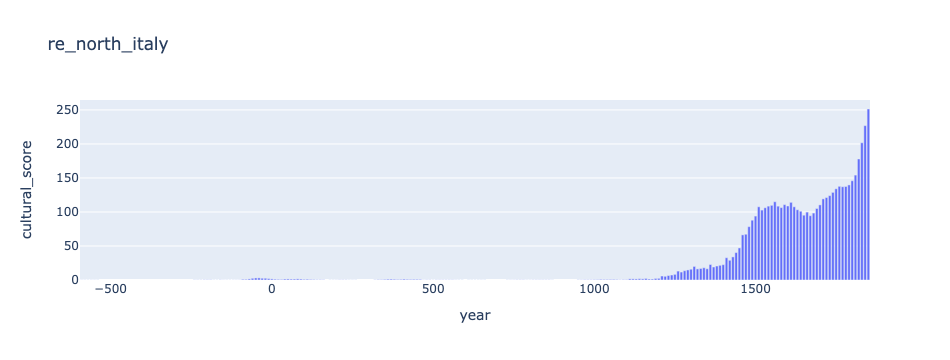

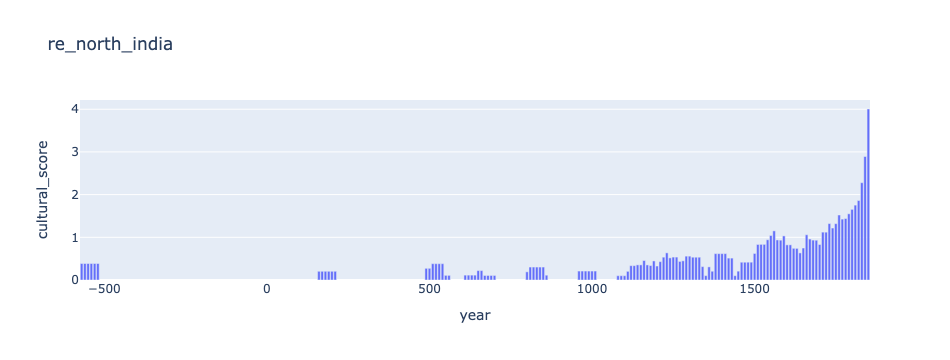

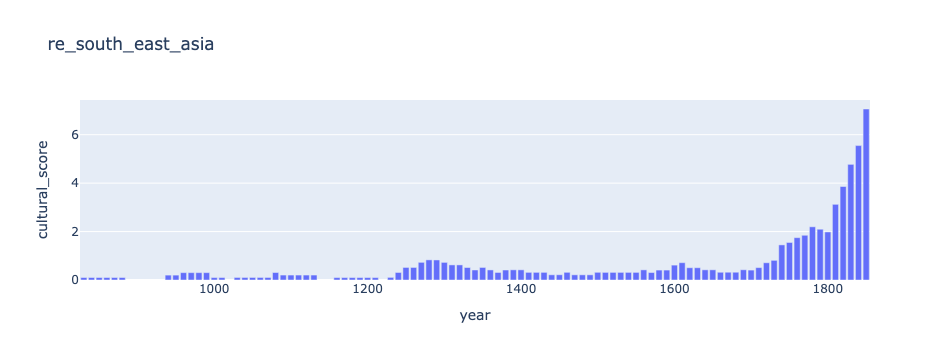

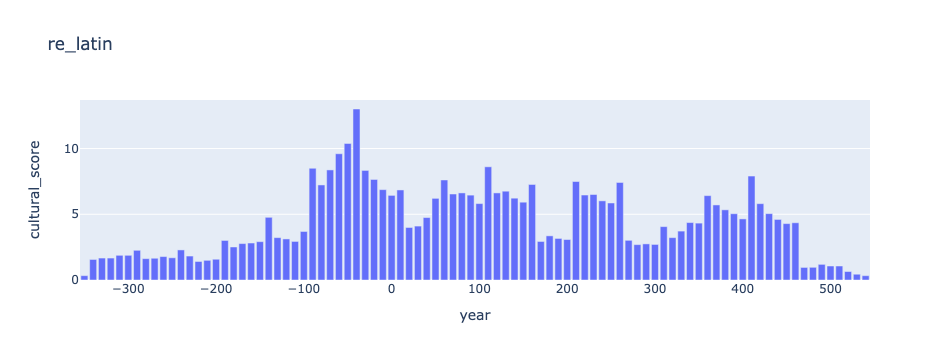

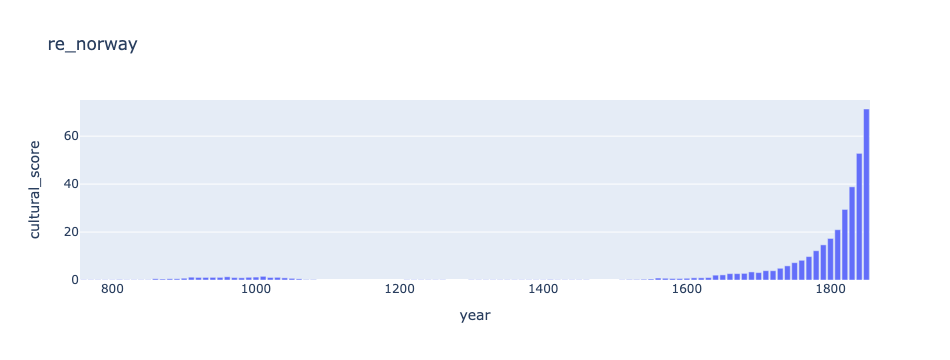

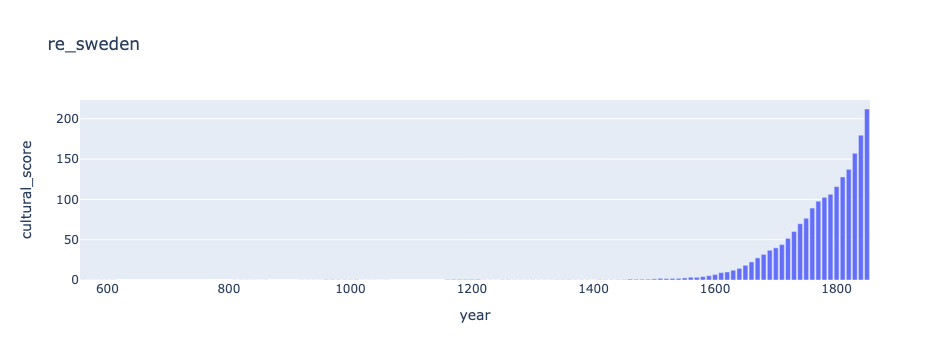

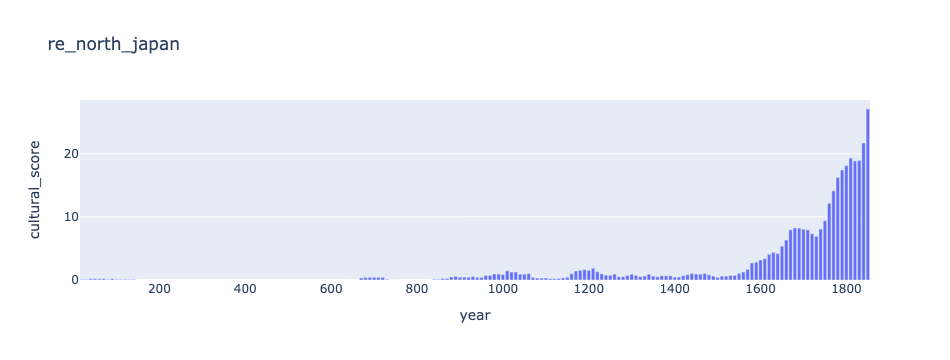

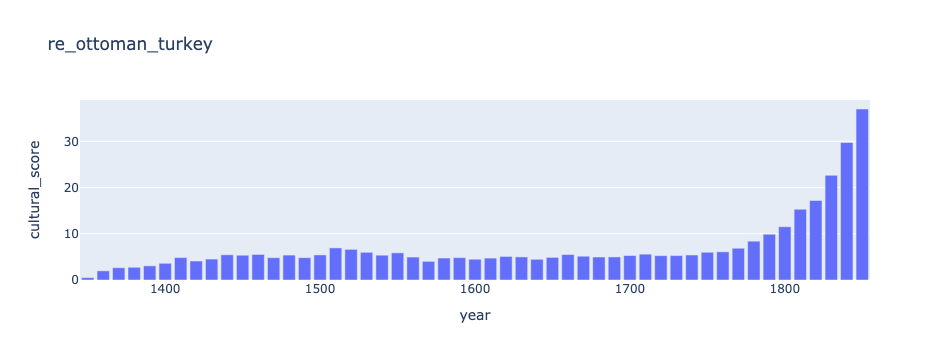

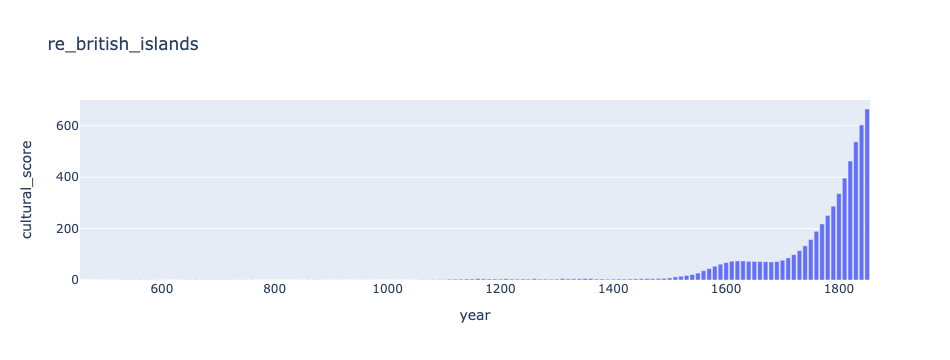

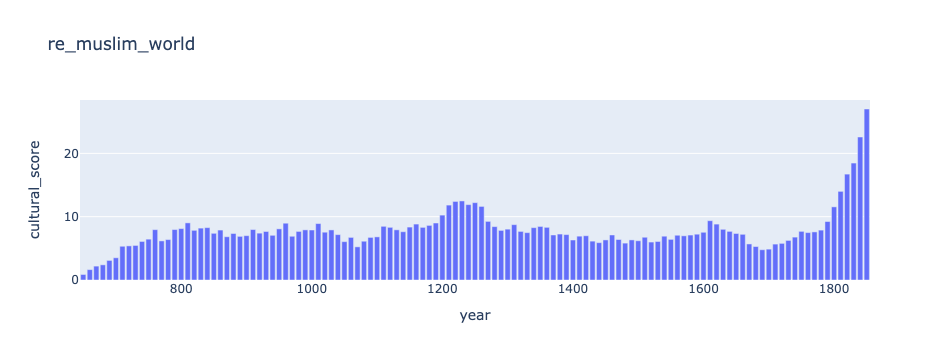

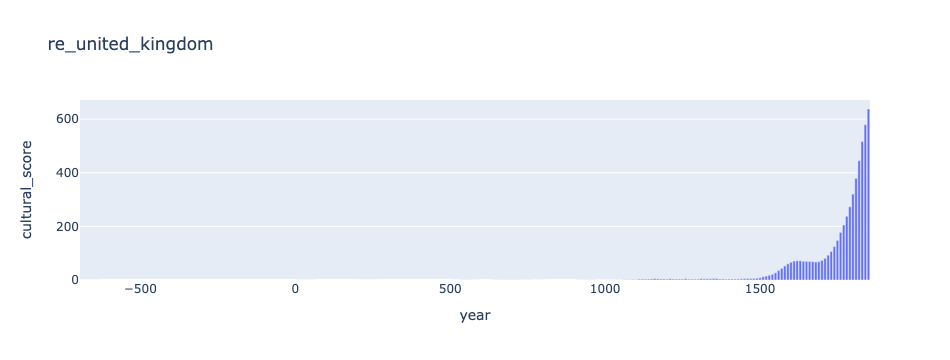

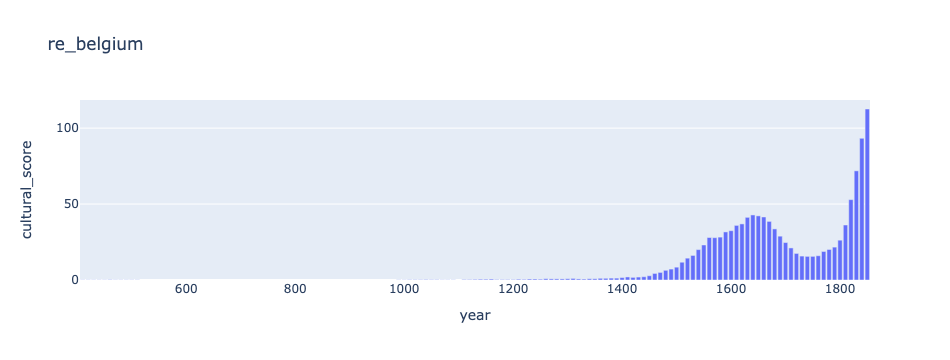

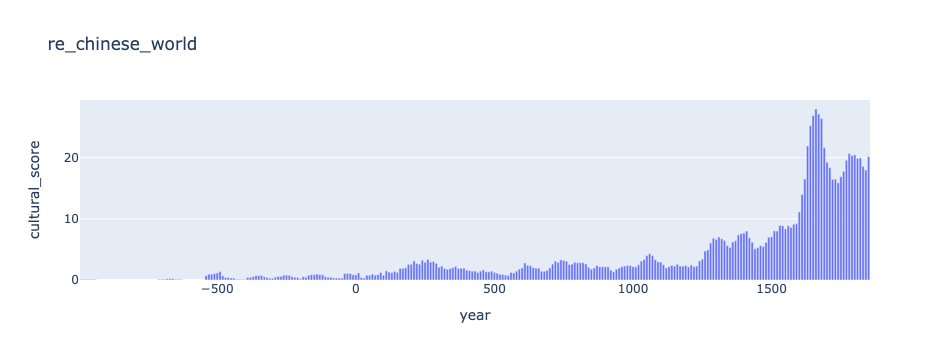

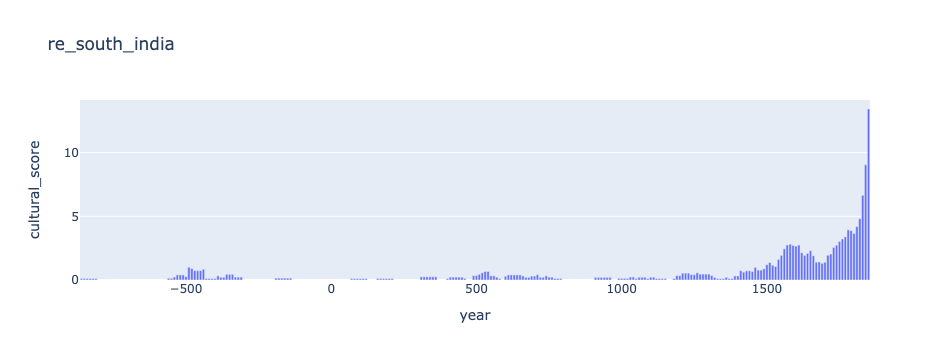

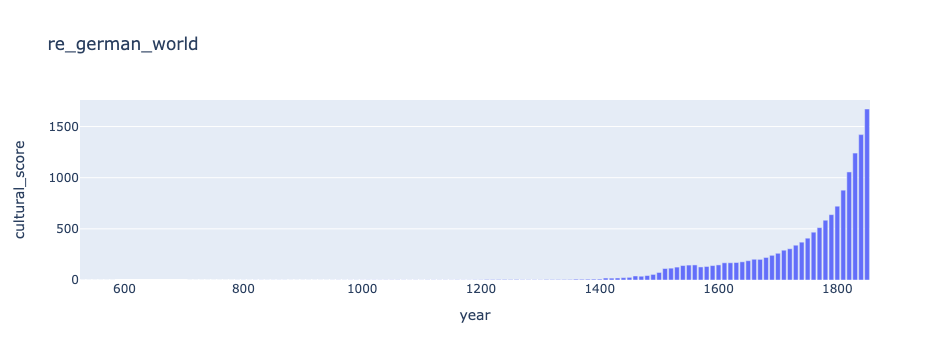

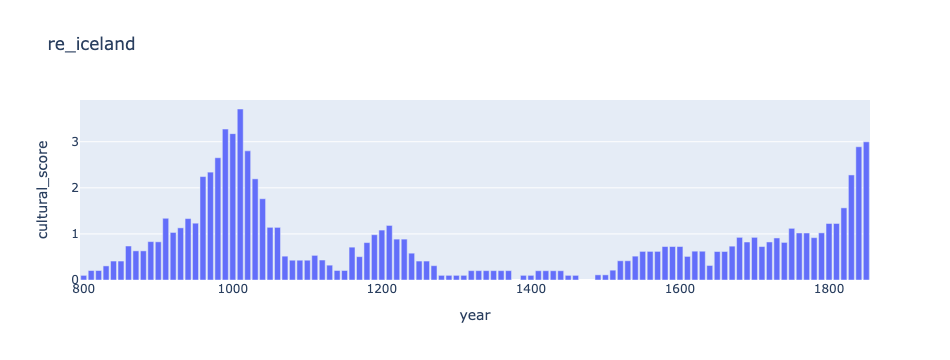

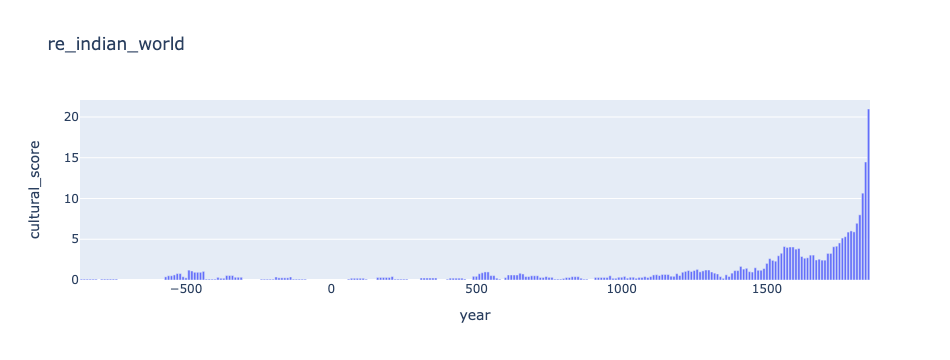

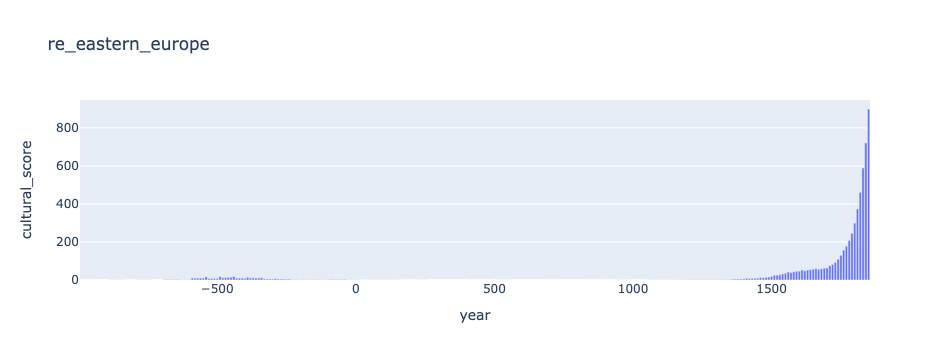

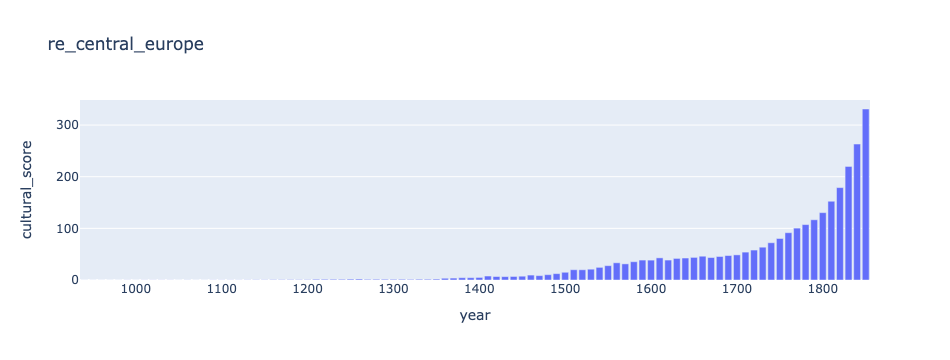

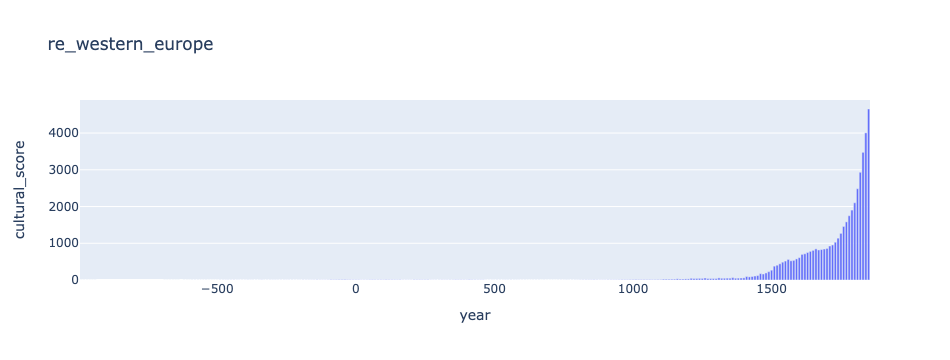

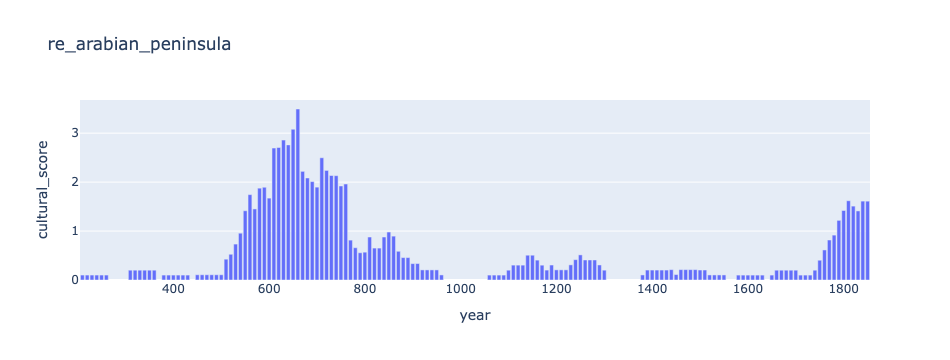

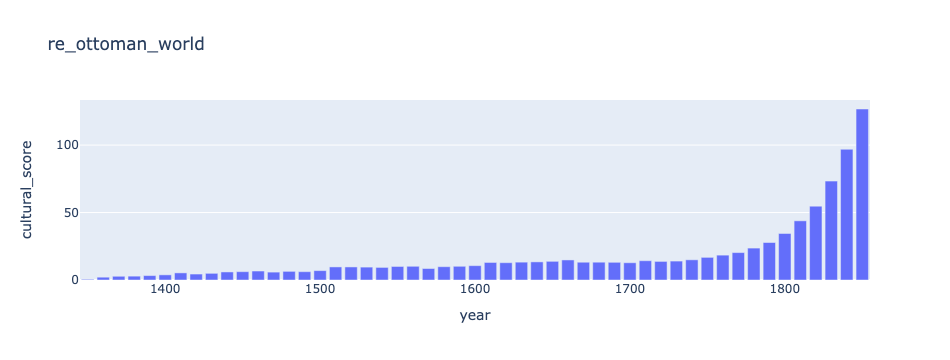

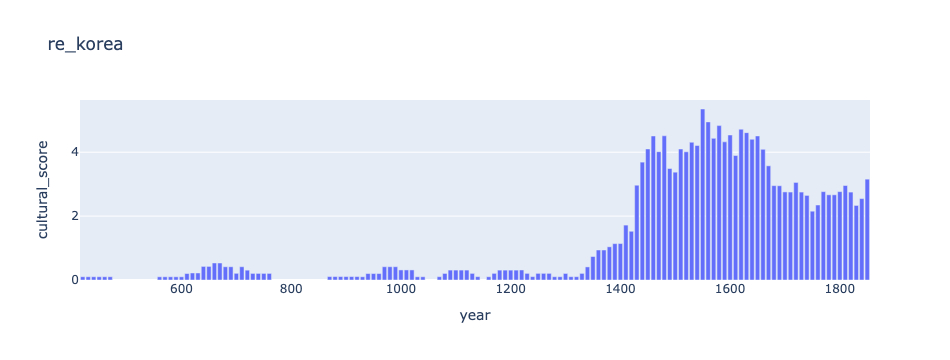

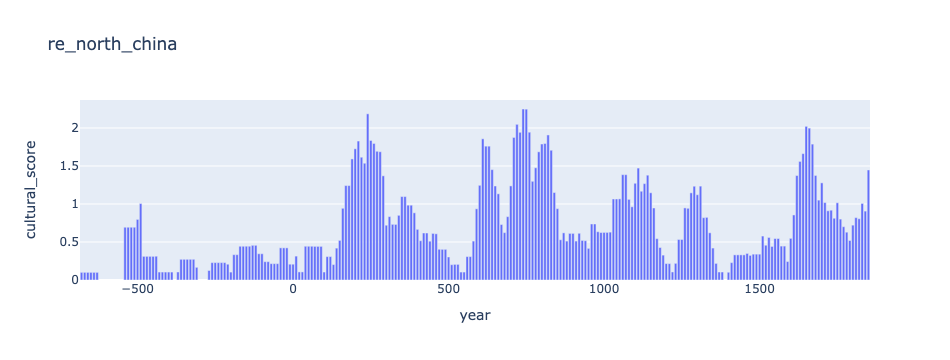

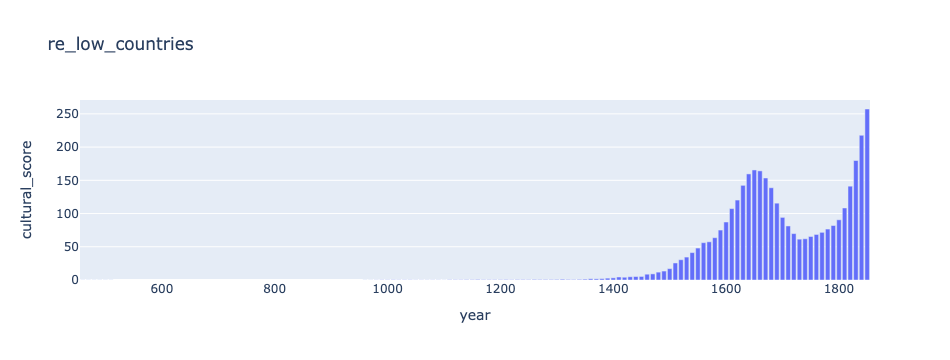

In [26]:
for reg in set(df_fig.region):
    df_test = df_fig[df_fig['region']==reg]
    fig = px.bar(df_test, x = 'year', y = 'cultural_score', title = reg)
    fig.show()

In [ ]:


def get_cultural_trends(individuals, regions):
    
   

   

    return df_fig